<a href="https://colab.research.google.com/github/edmilson-filho-cbm/cienciadedados/blob/main/Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preço de casas em São Paulo 
São Paulo é o estado mais populoso do Brasil, sendo que representa 22% da população brasileira e é a terceira maior economia da América Latina. Por tais aspectos, é um estado com alta taxa de imigração e por conseguinte, a procura por moradia e custa de vida, por exemplo, são informações importantes para quem está começando em um novo lugar.

Este trabalho visa extrair informações relevantes e que seja de fácil visualização de uma base de dados constituída de preço da moradia por m², bairro e quantidade de quartos.

Fonte: https://www.kaggle.com/brunofracasso/housing-prices-in-so-paulobrasil

**GRUPO 17:**

*   Arivane Noronha
*   Breno Nahuz
*   Edmilson Tavares

________________________________________________________________________________
Inicialmente, precisamos importar algumas bibliotecas que serão importantes e depois verificar se há inconsistência nos dados, como por exemplo inválidos ou faltantes.

**IMPORTAÇÃO DE BIBLIOTECAS E CAPTURA DE DADOS**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn import linear_model


In [ ]:
data = pd.read_csv('/content/dados_final_v2.csv')
data.head(10)

,Bairro,preco,Data,Dormitorios
0,ACLIMAÇÃO,8664.0,2018-01-01,1
1,ALTO DA BOA VISTA,10175.0,2018-01-01,1
2,BARRA FUNDA,9209.0,2018-01-01,1
3,BELA VISTA,8466.0,2018-01-01,1
4,BELÉM,5909.0,2018-01-01,1
5,BRÁS,6662.0,2018-01-01,1
6,BROOKLIN PAULISTA,11786.0,2018-01-01,1
7,BUTANTÃ,7034.0,2018-01-01,1
8,CAMPO BELO,10945.0,2018-01-01,1
9,CAMPO GRANDE,NaN,2018-01-01,1


**ANÁLISE DA QUALIDADE DOS DADOS**

In [ ]:
!pip install missingno

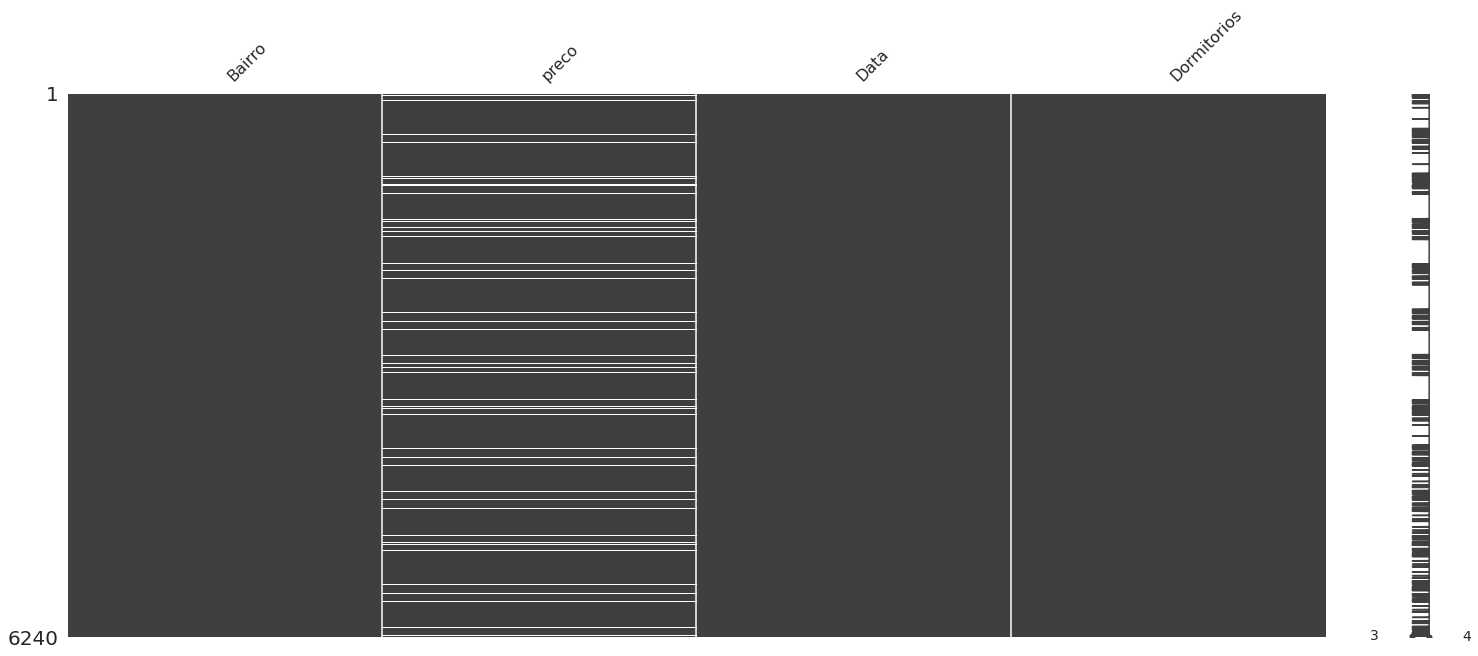

In [ ]:
import missingno as msno

msno.matrix(data)

In [ ]:
!pip install -U pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Profiling Dataset', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**TRATAMENTO DOS DADOS**

In [ ]:
data.isnull().sum()

Bairro           0
preco          410
Data             0
Dormitorios      0
dtype: int64

In [ ]:
data.dtypes

Bairro          object
preco          float64
Data            object
Dormitorios      int64
dtype: object

In [ ]:
data['preco'].fillna(data['preco'].mean(), inplace= True)
data.isnull().sum()
data.head(10)

,Bairro,preco,Data,Dormitorios
0,ACLIMAÇÃO,8664.00000,2018-01-01,1
1,ALTO DA BOA VISTA,10175.00000,2018-01-01,1
2,BARRA FUNDA,9209.00000,2018-01-01,1
3,BELA VISTA,8466.00000,2018-01-01,1
4,BELÉM,5909.00000,2018-01-01,1
5,BRÁS,6662.00000,2018-01-01,1
6,BROOKLIN PAULISTA,11786.00000,2018-01-01,1
7,BUTANTÃ,7034.00000,2018-01-01,1
8,CAMPO BELO,10945.00000,2018-01-01,1
9,CAMPO GRANDE,8039.75163,2018-01-01,1


**GRÁFICOS E FUNÇÕES**

In [ ]:
# Quantidades ?

qtd = data.groupby('Dormitorios')['Dormitorios'].count()
qtd.head()

Dormitorios
1    1560
2    1560
3    1560
4    1560
Name: Dormitorios, dtype: int64

In [ ]:
data_dorms = data[data.Dormitorios == 1]
data_bl = data_dorms[data_dorms.Bairro == "BELA VISTA"]

In [ ]:
data_bl.set_index('Data', inplace=True)
data_bl.head()

,Bairro,preco,Dormitorios
Data,,,
2018-01-01,BELA VISTA,8466.0,1
2019-01-01,BELA VISTA,8612.0,1
2018-02-01,BELA VISTA,8552.0,1
2019-02-01,BELA VISTA,8655.0,1
2018-03-01,BELA VISTA,8482.0,1


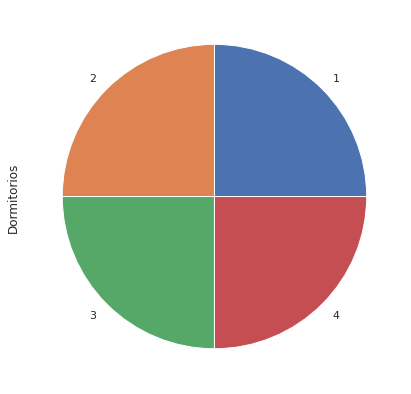

In [ ]:
plot = qtd.plot.pie(figsize=(7, 7))

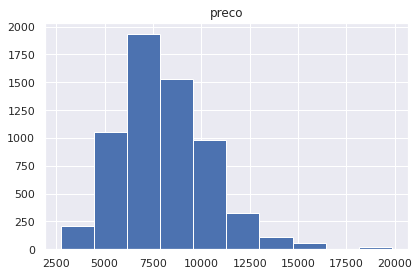

In [ ]:
data[['preco']].hist()
plt.tight_layout()
plt.show()

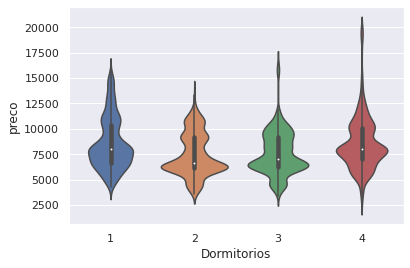

In [ ]:
sns.set_theme(color_codes=True)

sns.violinplot(data=data, x="Dormitorios", y="preco");

In [ ]:
def linear_reg(data, qnt_quartos, bairro):
    data_dorms = data[data.Dormitorios == qnt_quartos]
    data_bairro = data_dorms[data_dorms.Bairro == bairro]
    df2 = pd.DataFrame({'time': data_bairro.Data, 'price': data_bairro.preco})
    df2.time = pd.to_datetime(df2.time)
    
    regr = linear_model.LinearRegression()
    regr.fit(df2.time.values.reshape(-1, 1), df2['price'].values.reshape(-1, 1))

    # dados da predição
    y_pred = regr.predict(df2.time.values.astype(float).reshape(-1, 1))
    df2['pred'] = y_pred

    ax = df2.plot(x='time', y='price', color='black', style='.')
    df2.plot(x='time', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5)
    ax.set_title('Previsão Data vs Preço')
    ax.set_xlabel('Data')
    ax.set_ylabel('Preço')

    plt.show()

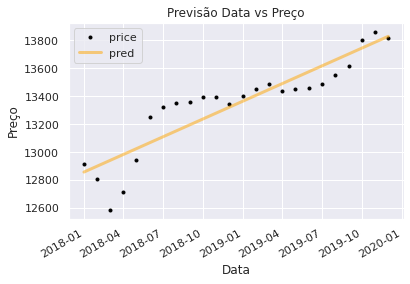

In [ ]:
linear_reg(data, 1, 'PINHEIROS')